# Folyamatkiegyensúlyozási feladat

Bővítmények importálása és a gráf felépítése, melyekbe belekerülnek a súlyok is.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

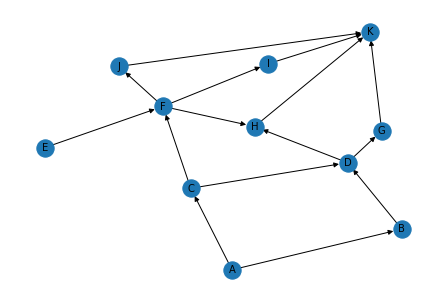

<Figure size 432x288 with 0 Axes>

In [120]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([("A","B",3),
                            ("A","C",3),
                            ("B","D",2.4),
                            ("C","D",1.6),
                            ("C","F",1.6),
                            ("D","G",2),
                            ("D","H",2),
                            ("E","F",3.5),
                            ("F","H",2.5),
                            ("F","I",2.5),
                            ("F","J",2.5),
                            ("G","K",2),
                            ("H","K",4),
                            ("I","K",3),
                            ("J","K",1)])
#pos = nx.spring_layout(DG)

nx.draw(DG,pos, with_labels=True,font_size=10)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test.png', dpi=100)

A súlyokat külön megfeleltetjük a feladatoknak a későbbi munkaállomások létrehozásához:

In [110]:
folyamatok = {'A': 3,
        'B': 2.4,
        'C': 1.6,
        'D': 2,
        'E': 3.5,
        'F': 2.5,
        'G': 2,
        'H': 4,
        'I': 3,
        'J': 1,
        'K':2}

weights=[folyamatok[i]for i in folyamatok] #összeadjuk a folyamatok idejét

átfutásiidő=sum(weights)
print( "A gráf összes élét összeadva megkapjuk az átfutaási időt:", átfutásiidő, "perc")

A gráf összes élét összeadva megkapjuk az átfutaási időt: 27.0 perc


In [127]:
#A kérdés:

ütemidő = 8*60/80
print(ütemidő, "ütemidő")

ciklusidő = max(weights)
print(ciklusidő, "ciklusidő")
# 6 perc telik el két termék előállítása között miminum ha 8 óra alatt elvárunk 80 terméket

6.0 ütemidő
4 ciklusidő


In [122]:
#
print(átfutásiidő/ütemidő) # =4.5 felfelé kell kerekíteni
num_munkallomas = 5  #hiszen 38,6 percnyi munkát kell elvégezni

4.5


D feladat első esete: 
              -az elsődleges szabály a leghosszabb műveleti idő, másodlagos a legtöbb követő szabály 

In [123]:
#első munkaállomás: a leghosszabb műveleti időt az E folyamat igényi:
első = [folyamatok["E"]]
második = [folyamatok["A"], folyamatok["B"]]
harmadik = [folyamatok["C"], folyamatok["F"],folyamatok["J"]]
negyedik = [folyamatok["I"], folyamatok["D"]]
ötödik = [folyamatok["H"], folyamatok["G"]]
hatodik = [ folyamatok["K"]]


print("1. munkaállomás E :", sum(első), "perc")
print("2. munkaállomás A , B :", sum(második), "perc")
print("3. munkaállomás C , F, J :", sum(harmadik), "perc")
print("4. munkaállomás I , D :", sum(negyedik), "perc")
print("5. munkaállomás H , G :", sum(ötödik), "perc")
print("6. munkaállomás K :", sum(hatodik), "perc")


1. munkaállomás E : 3.5 perc
2. munkaállomás A , B : 5.4 perc
3. munkaállomás C , F, J : 5.1 perc
4. munkaállomás I , D : 5 perc
5. munkaállomás H , G : 6 perc
6. munkaállomás K : 2 perc


D feladat második esete: az elsődleges szabály a legtöbb követő, másodlagos a leghosszabb műveleti idő

In [124]:
első = [folyamatok["A"],folyamatok["C"]]
második = [folyamatok["E"],folyamatok["F"]]
harmadik = [folyamatok["I"], folyamatok["B"]]
negyedik = [folyamatok["D"], folyamatok["H"]]
ötödik = [folyamatok["G"], folyamatok["J"], folyamatok["K"]]

print("1. munkaállomás A, C :", sum(első), "perc")
print("2. munkaállomás E , F :", sum(második), "perc")
print("3. munkaállomás I , B :", sum(harmadik), "perc")
print("4. munkaállomás D , H :", sum(negyedik), "perc")
print("5. munkaállomás G , J, K :", sum(ötödik), "perc")

1. munkaállomás A, C : 4.6 perc
2. munkaállomás E , F : 6.0 perc
3. munkaállomás I , B : 5.4 perc
4. munkaállomás D , H : 6 perc
5. munkaállomás G , J, K : 5 perc


e feladat:

In [128]:
#mindkét esetben a legmagasabb idő a munkaállomásoknál a maximum 6 perc így az ütemidővel is szorozhatunk.

első_munkaall = 6
print(átfutásiidő/(első_munkaall*ütemidő)*100 , "%")

masodik_munkaall=5
print(átfutásiidő/(masodik_munkaall*ütemidő)*100 , "%")

75.0 %
90.0 %


Hatékányobb láthatóan a második eset
